In [1]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df = pd.read_csv(r"C:\Users\bud07815\Desktop\yt_DA\exploratory-data-analysis-of-breast-cancer-survival-prediction-dataset\21239_breast_cancer_survival.csv")

In [2]:
df.shape

(2000, 10)

In [3]:
df.head()

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
0,eca1411e,NaN,Married,1959,3,1.7,Yes,Yes,No,2
1,63e3301c,39.0,Married,1966,0,1.6,Yes,No,No,2
2,01647916,71.0,Single,1964,3,3.1,No,No,No,2
3,07e33840,50.0,Married,1960,0,3.0,Yes,No,Yes,1
4,ed75da3f,44.0,Married,1965,4,2.6,Yes,No,No,1


In [4]:
df.tail(10)

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
1990,9e8f5b66,65.0,Married,1963,52,0.5,Yes,No,No,2
1991,e7a53d2b,72.0,Single,1961,39,1.5,Yes,No,No,2
1992,b0cac4d0,57.0,Single,1965,47,1.4,Yes,No,No,2
1993,1d8f5c6e,78.0,Married,1962,38,1.3,Yes,Yes,No,2
1994,36211c71,59.0,Married,1967,49,1.1,Yes,Yes,No,2
1995,62a66d96,61.0,Married,1967,33,2.6,No,No,No,2
1996,0d6864b0,48.0,Married,1968,31,2.0,Yes,Yes,No,2
1997,305defee,64.0,Married,1961,43,2.0,Yes,No,No,2
1998,2feb56e9,52.0,Married,1959,51,2.2,Yes,No,No,2
1999,307791aa,60.0,Married,1962,33,5.0,Yes,No,No,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Age                      1990 non-null   float64
 2   Marital_Status           1994 non-null   object 
 3   Year of Operation        2000 non-null   int64  
 4   Positive_Axillary_Nodes  2000 non-null   int64  
 5   Tumor_Size               2000 non-null   float64
 6   Radiation_Therapy        2000 non-null   object 
 7   Chemotherapy             2000 non-null   object 
 8   Hormone_Therapy          2000 non-null   object 
 9   Survival_Status          2000 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 156.4+ KB


In [6]:
# find the number of unique values corresponding to each column in the DataFrame

for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in Patient_ID: 2000
Number of unique values in Age: 54
Number of unique values in Marital_Status: 2
Number of unique values in Year of Operation: 12
Number of unique values in Positive_Axillary_Nodes: 52
Number of unique values in Tumor_Size: 46
Number of unique values in Radiation_Therapy: 2
Number of unique values in Chemotherapy: 2
Number of unique values in Hormone_Therapy: 2
Number of unique values in Survival_Status: 2


In [7]:
# descriptive statistical analysis

df.describe(include="all")

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
count,2000,1990.000000,1994,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000
unique,2000,NaN,2,NaN,NaN,NaN,2,2,2,NaN
top,eca1411e,NaN,Married,NaN,NaN,NaN,Yes,No,No,NaN
freq,1,NaN,1404,NaN,NaN,NaN,1604,1370,1822,NaN
mean,NaN,56.990452,NaN,1963.442000,9.667000,2.764100,NaN,NaN,NaN,1.509000
std,NaN,15.469798,NaN,3.388123,10.407366,1.321701,NaN,NaN,NaN,0.500044
min,NaN,30.000000,NaN,1958.000000,0.000000,0.500000,NaN,NaN,NaN,1.000000
25%,NaN,44.000000,NaN,1961.000000,3.000000,1.600000,NaN,NaN,NaN,1.000000
50%,NaN,57.000000,NaN,1963.000000,6.000000,2.700000,NaN,NaN,NaN,2.000000
75%,NaN,70.000000,NaN,1966.000000,13.000000,3.900000,NaN,NaN,NaN,2.000000


In [8]:
# data cleaning

In [9]:
# handling missing values

df.isnull().sum()

Patient_ID                  0
Age                        10
Marital_Status              6
Year of Operation           0
Positive_Axillary_Nodes     0
Tumor_Size                  0
Radiation_Therapy           0
Chemotherapy                0
Hormone_Therapy             0
Survival_Status             0
dtype: int64

In [10]:
# find the percentage of missing values in the dataset

missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
Patient_ID                 0.0
Age                        0.5
Marital_Status             0.3
Year of Operation          0.0
Positive_Axillary_Nodes    0.0
Tumor_Size                 0.0
Radiation_Therapy          0.0
Chemotherapy               0.0
Hormone_Therapy            0.0
Survival_Status            0.0
dtype: float64


<Axes: >

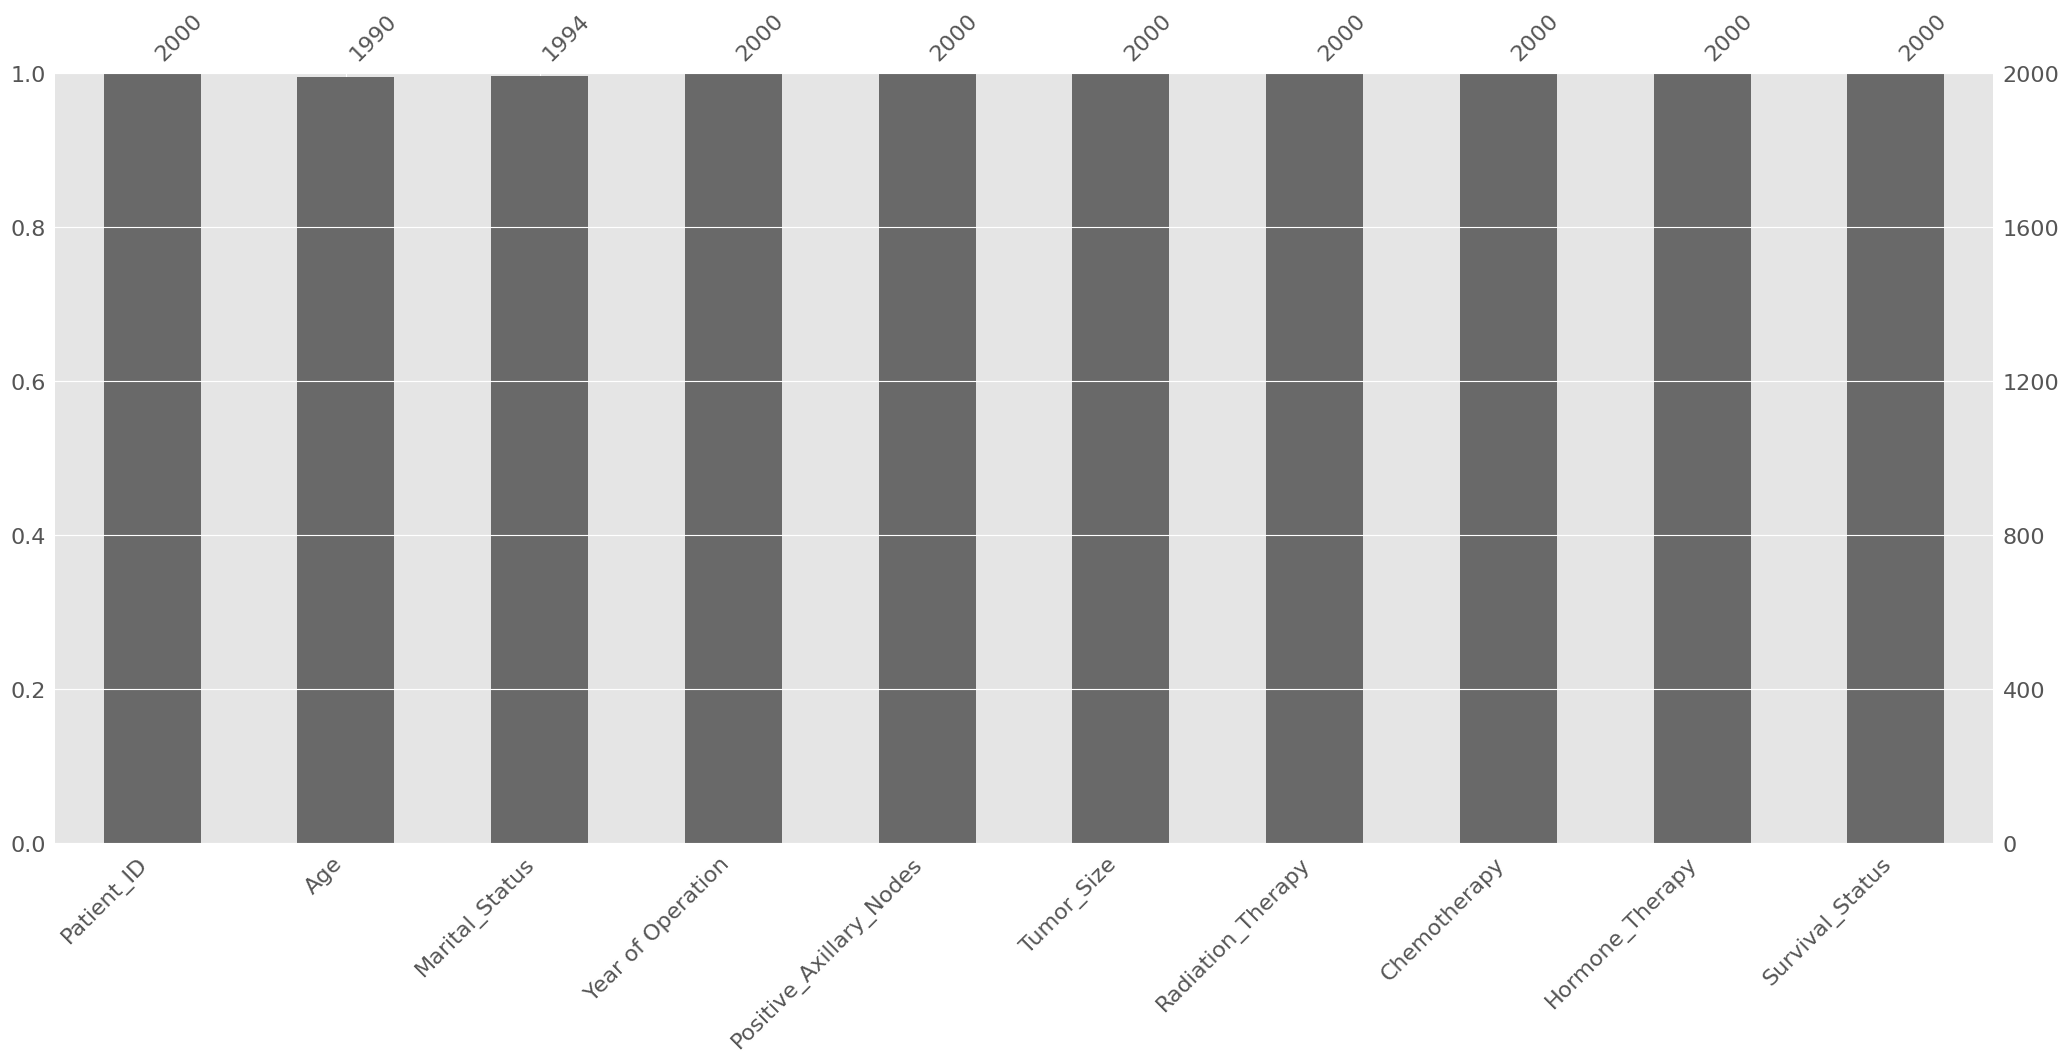

In [11]:
# visualising the missing values

msno.bar(df)

In [12]:
# imputation for ‘Age’ (numerical feature)
# impute missing values for the 'Age' column using mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
# imputation for ‘Marital_Status’ (Categorical Feature)
# impute missing values for the 'Marital_Status' column using mode
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode().iloc[0])

In [14]:
# missing values after imputation

df.isnull().sum()

Patient_ID                 0
Age                        0
Marital_Status             0
Year of Operation          0
Positive_Axillary_Nodes    0
Tumor_Size                 0
Radiation_Therapy          0
Chemotherapy               0
Hormone_Therapy            0
Survival_Status            0
dtype: int64

In [15]:
# removing irrelevant features

df = df.drop('Patient_ID', axis=1)

In [16]:
# removing duplicate rows

duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
       Age Marital_Status  Year of Operation  Positive_Axillary_Nodes  \
1008  41.0         Single               1967                        7   

      Tumor_Size Radiation_Therapy Chemotherapy Hormone_Therapy  \
1008         4.5               Yes           No              No   

      Survival_Status  
1008                1  


In [17]:
# removing duplicate rows and updating the DataFrame
df_cleaned = df.drop_duplicates()

In [18]:
# outlier detection

<Axes: xlabel='Positive_Axillary_Nodes'>

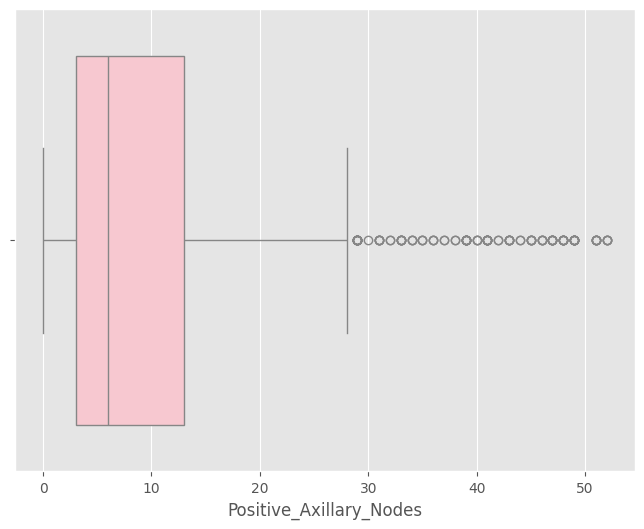

In [19]:
# box plots
# visualize the distribution of each numerical feature using box plots
# points beyond the “whiskers” of the box plot can be considered potential outliers

plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df['Positive_Axillary_Nodes'], color='pink')

In [20]:
# Z-score:
# calculate the Z-score for each data point, and points with a Z-score beyond a certain threshold (e.g., 3 or -3) can be considered outliers

# select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# calculate Z-scores for numeric columns
z_scores = zscore(numeric_cols)

# find outliers based on Z-scores
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)

outliers

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997     True
1998     True
1999    False
Length: 2000, dtype: bool

In [21]:
# QR (Interquartile Range)
# identify outliers based on the IQR
# points beyond a certain range outside the IQR can be considered outliers

# calculate quartiles for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# align the DataFrame with quartile values
df_aligned = df[numeric_cols.columns]

# find outliers based on IQR
outliers = ((df_aligned < (Q1 - 1.5 * IQR)) | (df_aligned > (Q3 + 1.5 * IQR))).any(axis=1)

outliers

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool

In [22]:
# data visualisation

In [23]:
# univariate analysis

<Axes: xlabel='Positive_Axillary_Nodes', ylabel='Count'>

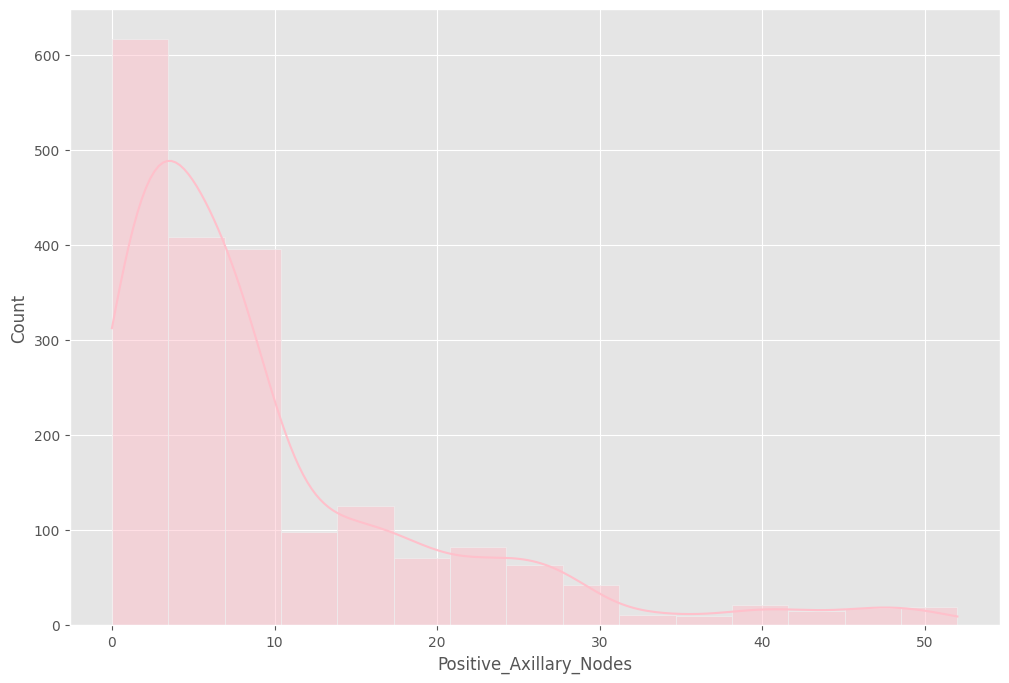

In [24]:
# question 1: what is the distribution of positive axillary nodes in the patients?

sns.histplot(df['Positive_Axillary_Nodes'], bins=15, kde=True, color='pink')

In [25]:
# analysis 1: The distribution appears to be left-skewed, with a mode (the most frequent value) at around 0 positive axillary nodes.
# There are also a few data points at the higher end of the distribution, up to 50 positive axillary nodes.
# The left tail of the distribution is longer than the right tail, which means that there are more data points with lower numbers of positive axillary nodes than there are with higher numbers of positive axillary nodes.

([<matplotlib.patches.Wedge at 0x1f577b38320>,
 [Text(-0.8796531589644841, -0.6604622017373925, 'Married'),
  Text(0.8796532208014145, 0.6604621193783169, 'Single')],
 [Text(-0.47981081398062764, -0.36025211003857766, '70.5%'),
  Text(0.4798108477098624, 0.36025206511544555, '29.5%')])

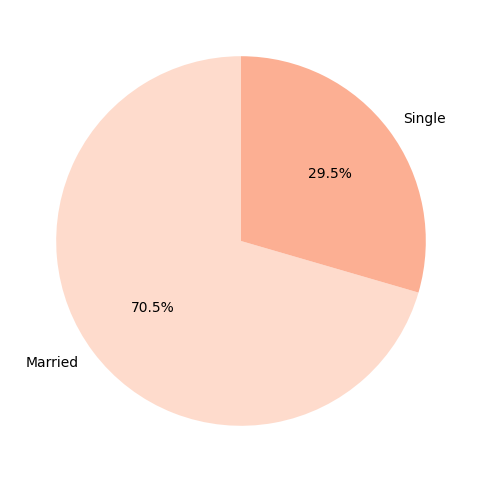

In [26]:
# question 2: how is the dataset distributed across different marital statuses, and what percentage of patients belong to each category?

marital_counts = df['Marital_Status'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'))

In [27]:
# analysis 2: There are 70.4% of married people and 29.6% of Single people in our dataset.

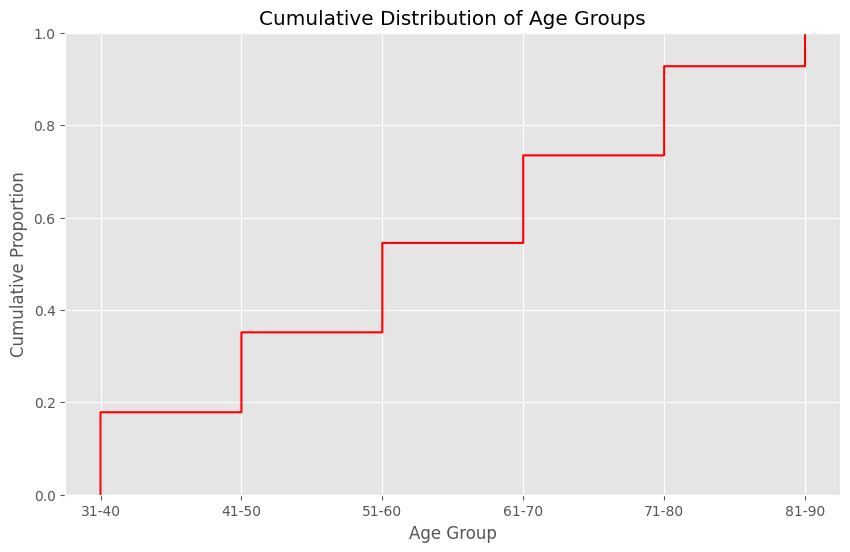

In [28]:
# question 3: what is the cumulative distribution of age groups in the Cancer Survival Prediction dataset, and how does it illustrate the overall distribution of patients across different age groups?

# define age groups
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# create 'Age_Group' column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# plot cumulative distribution of age groups
plt.figure(figsize=(10, 6))
sns.ecdfplot(df['Age_Group'], color='red')
plt.xlabel('Age Group')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Distribution of Age Groups')
plt.show()

In [29]:
# bivariate and multivariate analysis

In [30]:
# heatmap

# data transformation
# convert object-type columns to numerical representations

df['Radiation_Therapy'] = label_encoder.fit_transform(df['Radiation_Therapy'])
df['Chemotherapy'] = label_encoder.fit_transform(df['Chemotherapy'])
df['Hormone_Therapy'] = label_encoder.fit_transform(df['Hormone_Therapy'])
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes

In [31]:
# compute correlation matrix

numeric_df = df.drop(columns=['Age_Group'])

corr_matrix = numeric_df.corr()

<Axes: >

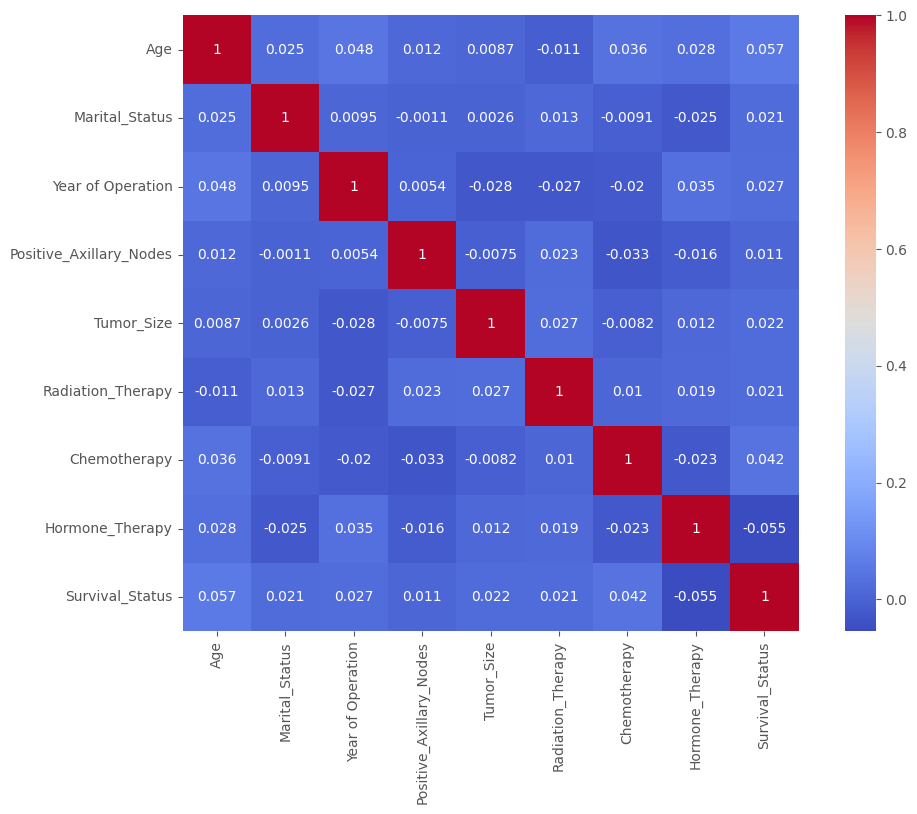

In [32]:
# generate heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

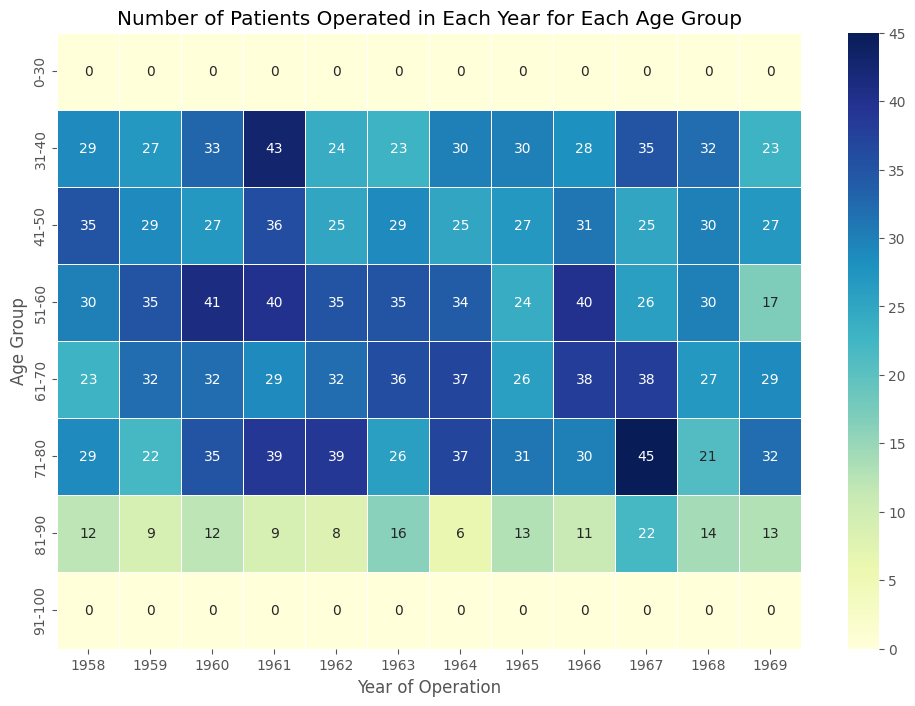

In [33]:
# question 4: How many patients were operated in each year for each Age group?

# pivot table to get the count of patients operated in each year for each age group
pivot_table = df.pivot_table(index='Age_Group', columns='Year of Operation', aggfunc='size', fill_value=0, observed=False)

# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Number of Patients Operated in Each Year for Each Age Group')
plt.xlabel('Year of Operation')
plt.ylabel('Age Group')
plt.show()

In [34]:
# analysis 4: There are certain combinations of year and age groups that stand out. For example, the combination of '1967' on the X-axis and '71-80' on the Y-axis has the highest value. 
# This suggests that in the year 1967, there were a significant number of patients in the age group of 71 to 80 who underwent operations.
# On the other hand, the combination of '1964' and '81–90' has the lowest value, indicating fewer patients in that specific age group in that year.

<Axes: xlabel='Survival_Status', ylabel='Positive_Axillary_Nodes'>

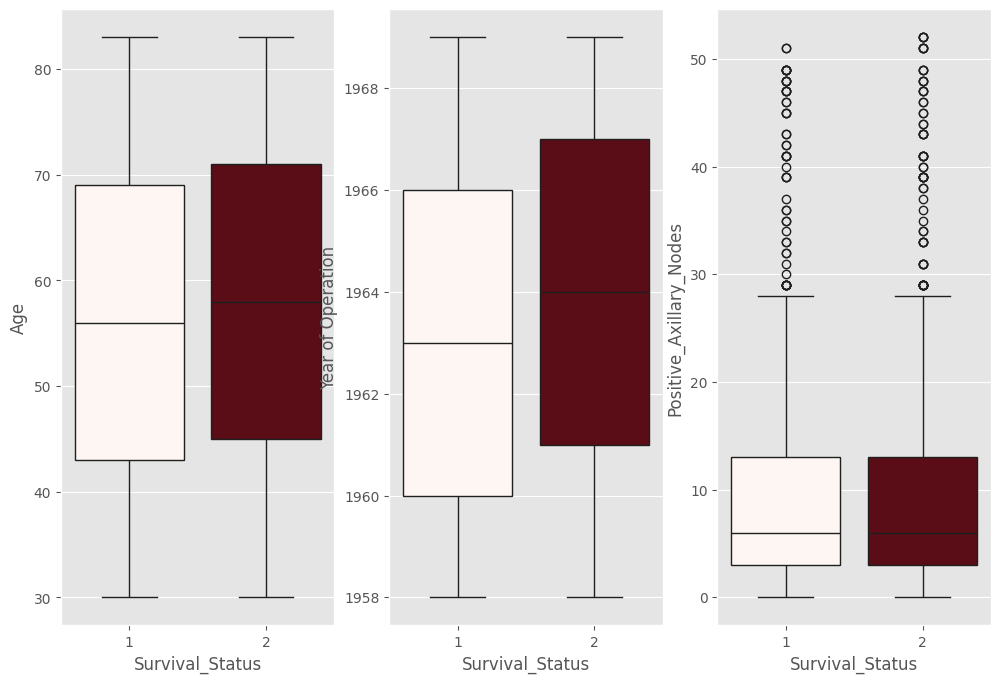

In [35]:
# box plot

# subplot 1
plt.subplot(1, 3, 1)
sns.boxplot(x='Survival_Status', y='Age', data=df, hue='Survival_Status', palette='Reds', legend=False)
# subplot 2
plt.subplot(1, 3, 2)
sns.boxplot(x='Survival_Status', y='Year of Operation', data=df, hue='Survival_Status', palette='Reds', legend=False)
# subplot 3
plt.subplot(1, 3, 3)
sns.boxplot(x='Survival_Status', y='Positive_Axillary_Nodes', data=df, hue='Survival_Status', palette='Reds', legend=False)

In [36]:
# questions 5/a:
# Does the distribution of ages vary between patients who survived and those who did not?
# Are there any noticeable differences in the median age or the spread of ages for different survival outcomes?

# questions 5/b:
# Are there any trends or patterns in the distribution of the year of operation for patients based on their survival status?
# Does the boxplot reveal any significant differences in the years of operation for patients who survived compared to those who did not?

# questions 5/c:
# How does the distribution of positive axillary nodes differ between patients with different survival outcomes?
# Are there any clear differences in the spread of positive axillary nodes for survivors and non-survivors?

In [37]:
# analysis 5:
# The box plots for patient age and the year of operation exhibit comparable statistics, suggesting that the distribution of these features may share similar characteristics.
# On the other hand, the box plot for positive axillary nodes reveals a notable presence of outliers, which is a common observation in medical datasets.
# In the context of cancer survival, the presence of outliers in positive axillary nodes suggests instances where patients had an unusually high count of positive axillary nodes.

In [38]:
# violin plot

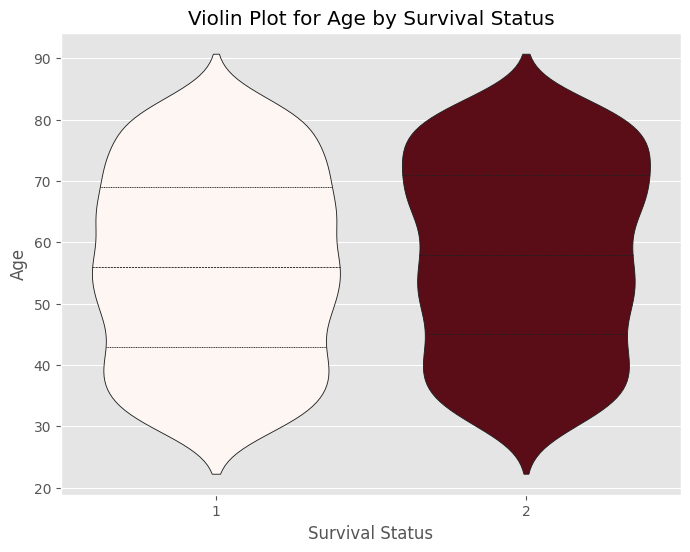

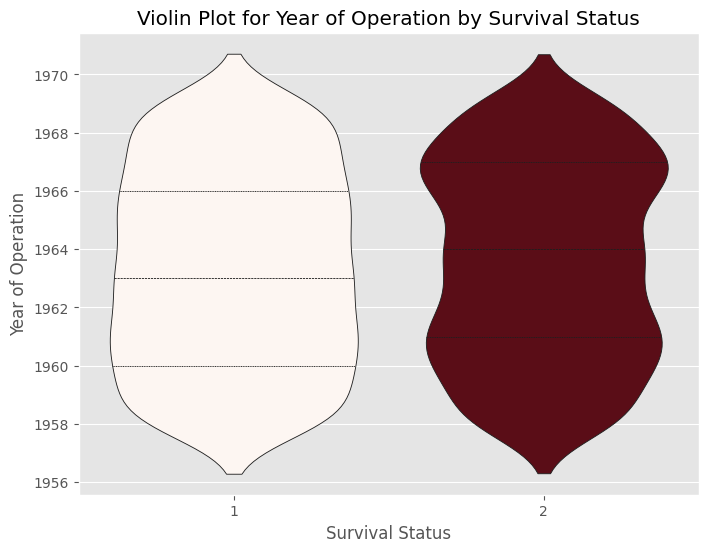

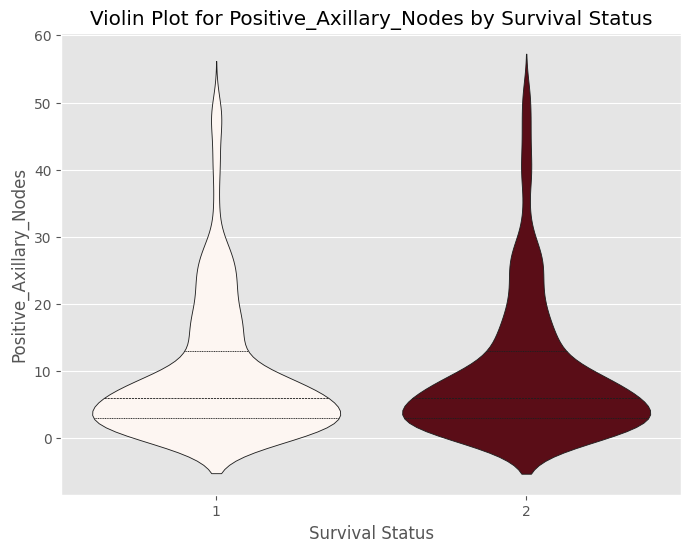

In [39]:
# features of interest
selected_features = ['Age', 'Year of Operation', 'Positive_Axillary_Nodes']

# plotting violin plots for selected features
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Survival_Status', y=feature, data=df, hue='Survival_Status', palette='Reds', inner='quartile', legend=False)
    plt.title(f'Violin Plot for {feature} by Survival Status')
    plt.xlabel('Survival Status')
    plt.ylabel(feature)
    plt.show()

In [40]:
# question 6/a:
# How does the age distribution vary between patients who survived and those who did not?

# question 6/b:
# What insights can be gained regarding the year of operation for patients with different survival outcomes?

# question 6/c:
# How is the distribution of positive axillary nodes different for patients with varying survival outcomes?

In [41]:
# analysis 6: Violin plots represent the underlying distribution of the data in addition to the statistical summary, therefore in general are more informative as compared to the box plots . In the violin plot of positive axillary nodes, it is observed that the distribution is highly skewed for class label = ‘yes’ and ‘no’. This indicates that –
# For the majority of patients (in both classes), the number of positive axillary nodes detected are on the lesser side.
# These observations are consistent with our observations from previous sections.

In [42]:
# pair plot

In [43]:
# question 7:
# What is the interpretation of the symmetric pattern observed in the upper and lower halves of the diagonal in the pair plot?
# How does the symmetry observed in the pair plot affect the analysis of feature relationships?
# What information can be gained by analyzing either the upper or lower triangle of the pair plot?
# What is the significance of the diagonal plots in the pair plot, and what do they represent?
# How does the substantial overlap between any two features, as observed in the pair plot, impact the distinction between class labels?
# What insights can be drawn from the kernel density smoothed histograms present in the diagonal plots of the pair plot?
# In what ways does the pair plot provide a visualization of the univariate distribution of each specific feature?

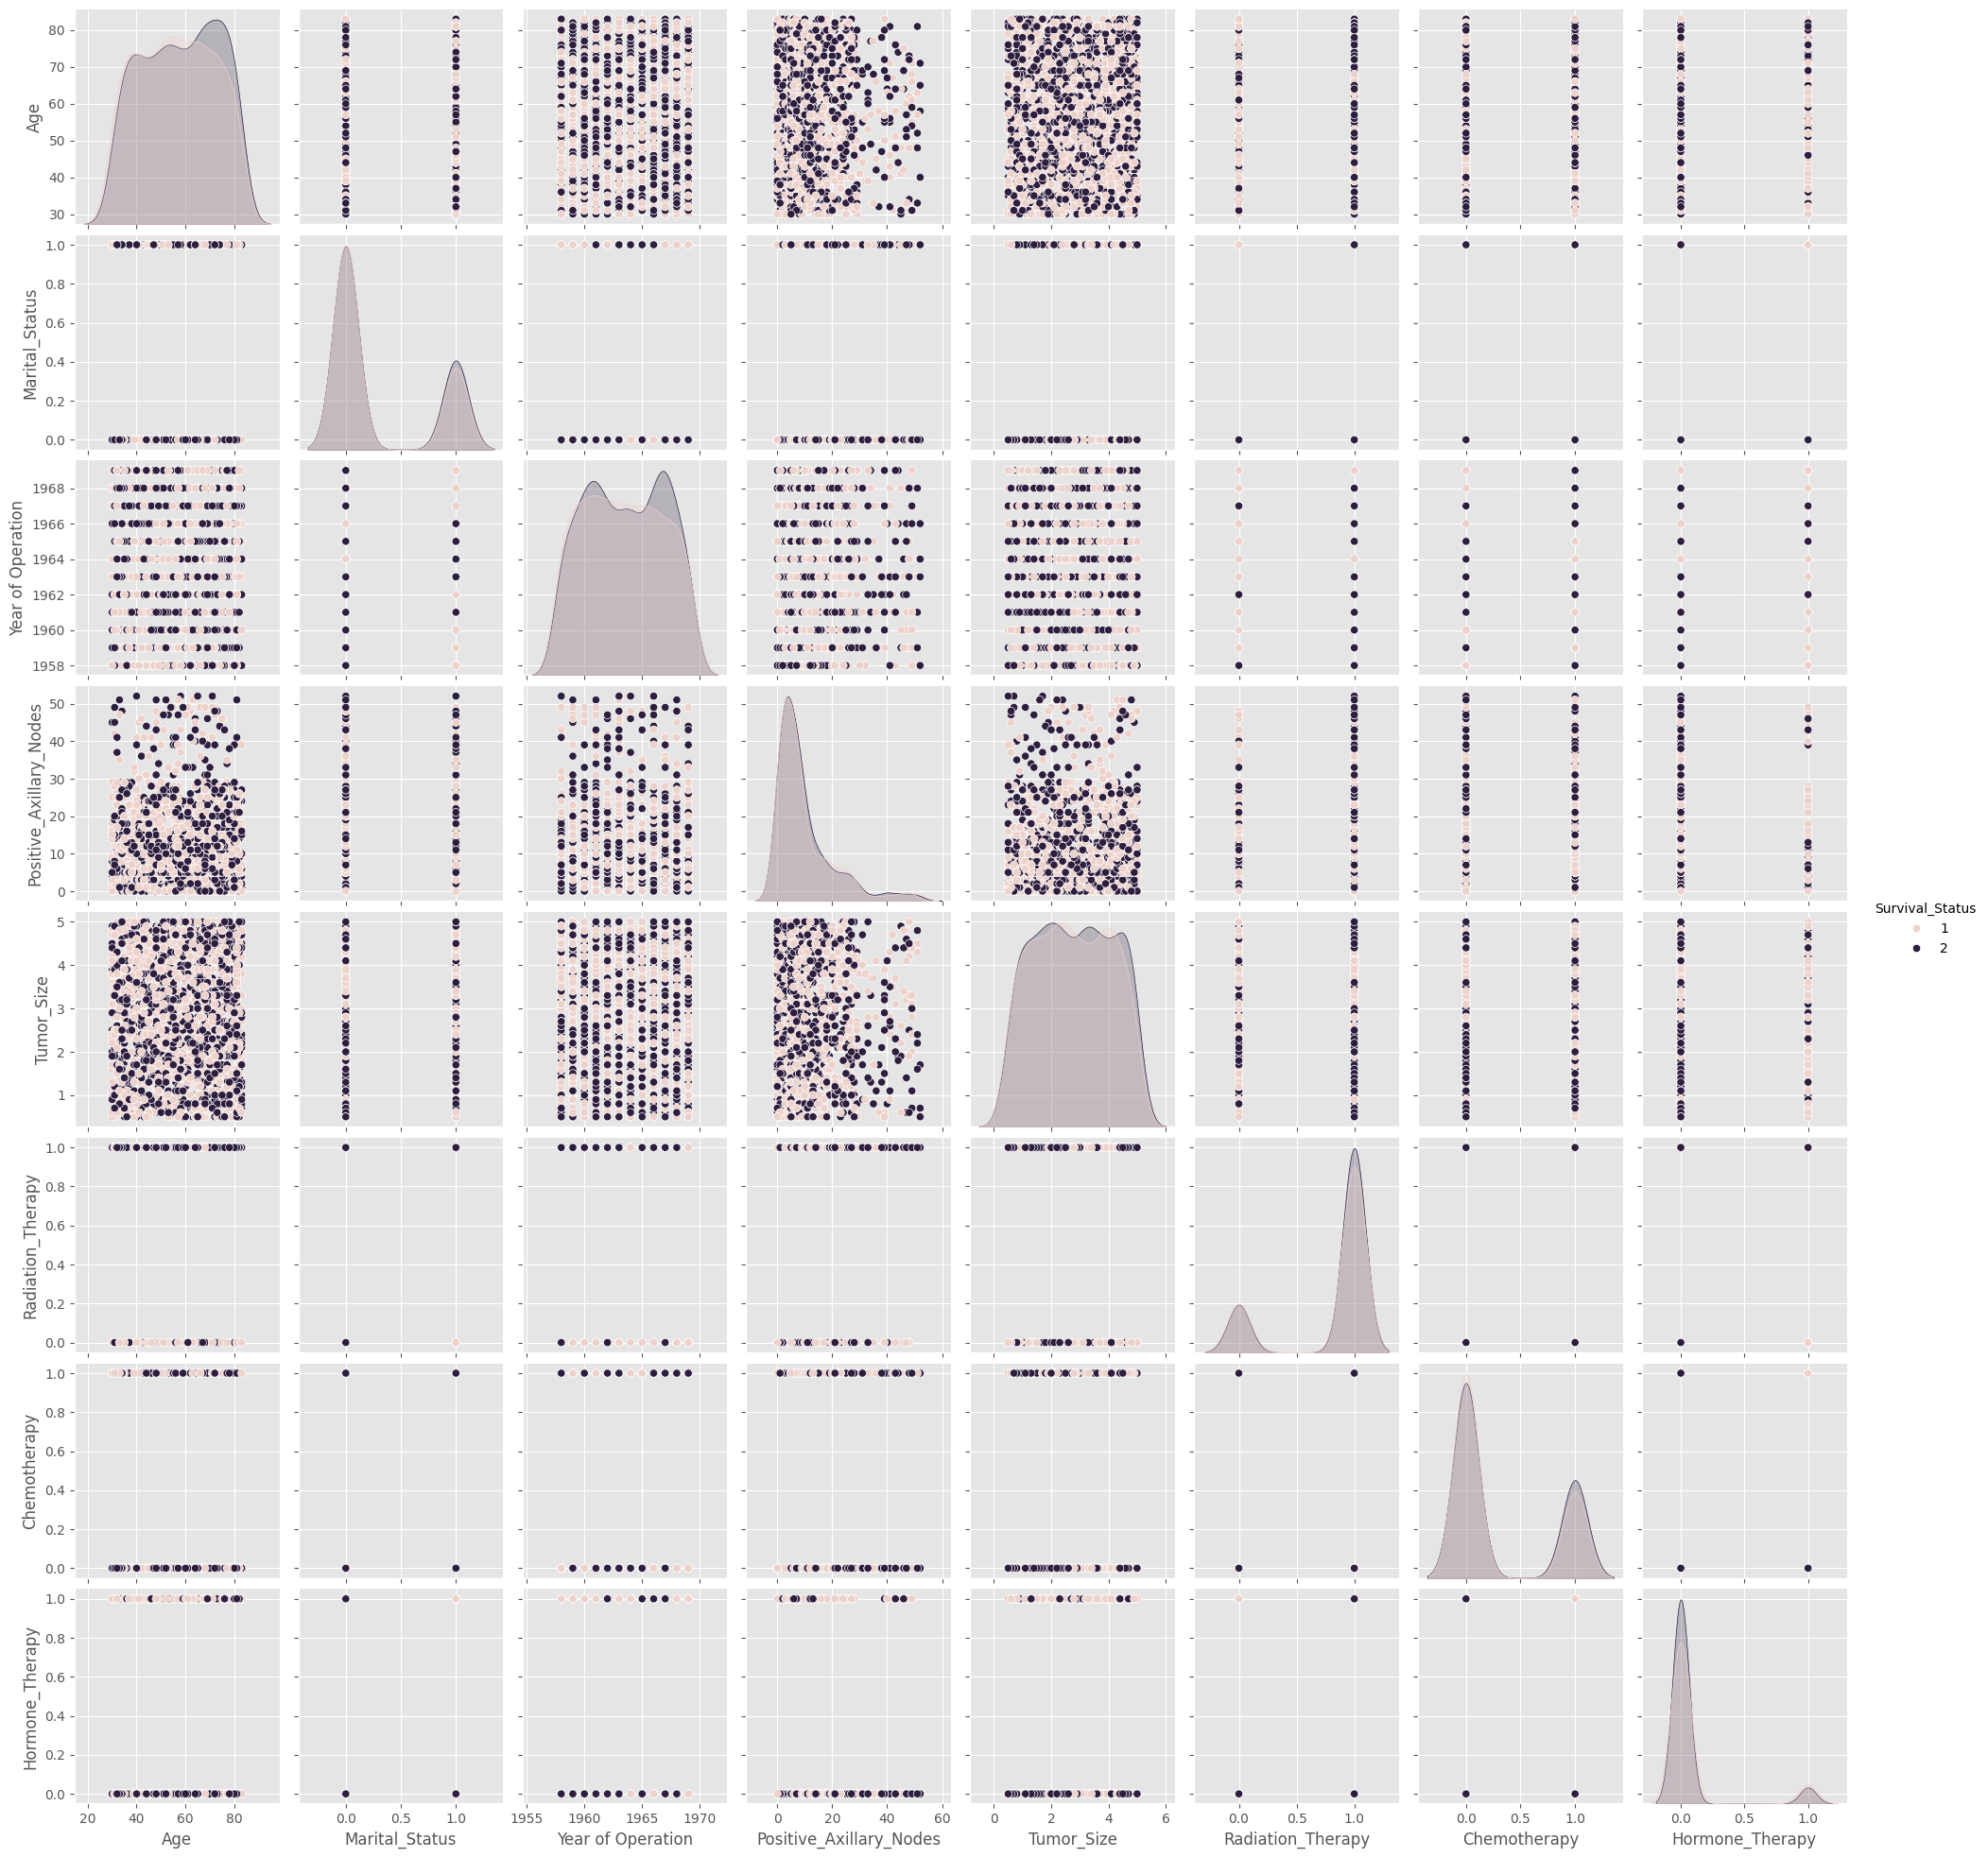

In [44]:
sns.pairplot(df, hue='Survival_Status')
plt.show()

In [45]:
# analysis 7: Analysis: The pair plot reveals a symmetric pattern in the upper and lower halves of the diagonal, indicating that the relationship between pairs of features remains consistent when the axes are interchanged.
# This symmetry implies that analyzing either the upper or lower triangle would provide essentially the same information.
# The diagonal plots in our pair plot showcase kernel density smoothed histograms, offering a visual representation of the univariate distribution of each specific feature. This allows us to examine the distribution of individual variables.
# However, a notable observation from our pair plot is the substantial overlap between any two features, indicating a lack of clear distinction between class labels when considering these feature pairs.

In [46]:
# scatter plot

In [47]:
# question 8: Is there a correlation between Tumor_Size and the number of Positive_Axillary_Nodes?

<Axes: xlabel='Tumor_Size', ylabel='Positive_Axillary_Nodes'>

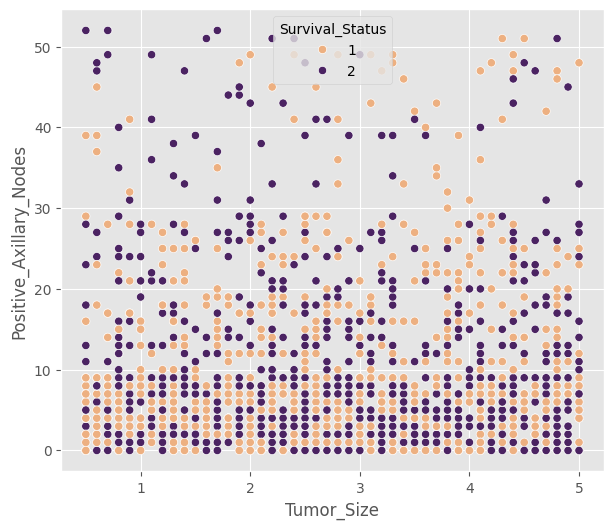

In [48]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x='Tumor_Size', y='Positive_Axillary_Nodes', data=df, hue='Survival_Status', palette='flare')

In [49]:
# analysis 8: In this scatter plot, we observe a moderate positive relationship between the number of positive axillary nodes and tumor size.
# The density of points suggests a spread of data, with a trend indicating that larger tumor sizes tend to correlate with an increased number of positive axillary nodes.
# However, many outlier points deviate from this trend, warranting further investigation for potential anomalies.
# The plot highlights a dense cluster representing a specific range of positive axillary nodes and tumor sizes, providing valuable insights for healthcare decision-making.

In [50]:
# joint plot

In [51]:
# question 8:
# What information does the scatter plot in the center of the visualization convey?
# How are the histograms along the axes utilized in the visualization?
# What does the histogram on the top edge of the plot reveal about the likelihood of different age groups undergoing surgery?
# What insights does the histogram on the right edge provide regarding the number of positive axillary nodes among patients?

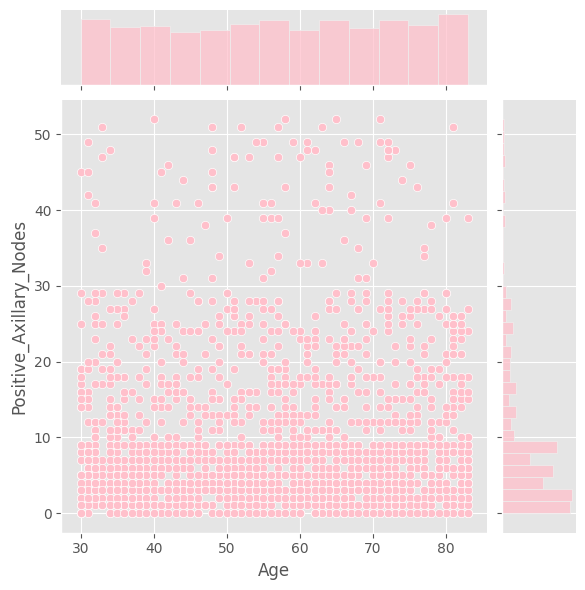

In [52]:
sns.jointplot(x='Age', y='Positive_Axillary_Nodes', data=df,color='pink')
plt.show()

In [53]:
# analysis 9:
# The scatter plot in the center shows the relationship between the patient’s age and the number of positive axillary nodes.
# The histograms along the axes display the distribution of each variable individually.
# The histogram on the top edge indicates that all age-groups are almost equally likely to get operated.
# The histogram on the right edge indicates that the majority of patients had fewer than 10 positive axillary nodes.

In [54]:
# contour plot

In [55]:
# question 10: Plotting a contour plot using the seaborn library for patient’s age on x-axis and operation year on the y-axis

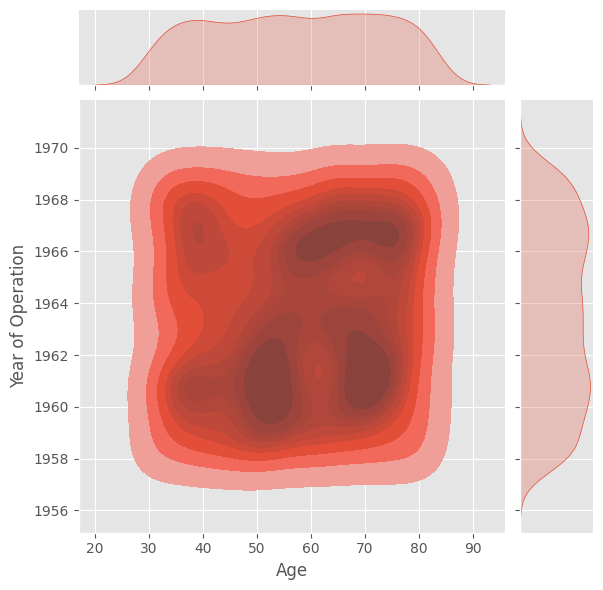

In [56]:
sns.jointplot(x='Age', y='Year of Operation', data=df, kind='kde', fill=True)
plt.show()

In [ ]:
# analysis 10: From the above contour plot, it can be observed that the years 1961–1963 witnessed more patients in the age group of 58–75 years.